# ISE390
## Data Science
### Final exam Part II
### Time: 50 minutes



You are given 70,000 images (each image consists of 28*28 pixels) of hand-written digits from 0-9.
The task is to design a classifier that can recognize these images. In other words, you input an image from this dataset and the output is a predicted number from 0 to 9.

For this problem, we only focus on classification task between two digits: 3, and 8 in one round and 5 and 6 in the other round, meaning that you deal with a binary classification task. 


The dataset contains 60,000 images for training and 10,000 for test. 
Do the following:
1. Extract all images contaning digits 3 and 8 both in training and test data set.
2.	Plot an image of digit 3 from training data. It could be any image of digit 3.
3.	Train a feedforward neural network with the following architecture: 
    - Three layers
    -	256 hidden units
    -	feedforward
    -   number of epoch = 10
4.	Print out the accuracy of your model for each epoch both for the test and train sets
5.	Report the results in terms of a confusion matrix
6.	Repeat step 3,4,and 5 but with 25 hidden units
7.	Repeat  1-6 with input images 5 and 6



In [194]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Get indices of all the 3 and 8 images

In [195]:
indices_train_3and8 = np.where((y_train == 3) | (y_train == 8))
indices_test_3and8 = np.where((y_test == 3) | (y_test == 8))

# 1. Extract the 3 and 8 images

In [196]:
x_train = np.array(x_train)[indices_train_3and8]
y_train = np.array(y_train)[indices_train_3and8]

x_test = np.array(x_test)[indices_test_3and8]
y_test = np.array(y_test)[indices_test_3and8]

(11982,)
(1984,)


# 2. Plot an image of digit 3

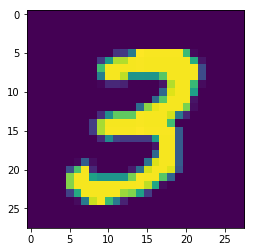

In [180]:
plt.imshow(x_train[0])
plt.show()

In [198]:
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Need to set values to either 0 or 1, other wise the index error occurs.

In [215]:
y_train[y_train == 3] = 0
y_train[y_train == 8] = 1
y_test[y_test == 3] = 0
y_test[y_test == 8] = 1

[0 0 0 ... 1 0 1]


# 3. Train a feedforward neural network

In [222]:
# Implementation of a simple MLP network with one hidden layer. Tested on the iris data set.
# Requires: numpy, sklearn>=0.18.1, tensorflow>=1.0

# NOTE: In order to make the code simple, we rewrite x * W_1 + b_1 = x' * W_1'
# where x' = [x | 1] and W_1' is the matrix W_1 appended with a new row with elements b_1's.
# Similarly, for h * W_2 + b_2

# author :vinhkhuc  Feb 26, 2017

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)


def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, w_2):
    """
    Forward-propagation.
    IMPORTANT: yhat is not softmax since TensorFlow's softmax_cross_entropy_with_logits() does that internally.
    """
    h    = tf.nn.sigmoid(tf.matmul(X, w_1))  # The \sigma function
    yhat = tf.matmul(h, w_2)  # The \varphi function
    return yhat

def get_data(data, target):
    """ Read the iris data set and split them into training and test sets """
    
    # Prepend the column of 1s for bias
    N, M = data.shape
    all_X = np.ones((N, M + 1))
    all_X[:, 1:] = data

    # Convert into one-hot vectors
    num_labels = len(np.unique(target)) # needs to be nine since the options are 3 and 8, not 0 and 1
    all_Y = np.eye(num_labels)[target]
    return all_X, all_Y

def main():
    train_X, train_y = get_data(x_train, y_train)
    test_X, test_y = get_data(x_test, y_test)

    # Layer's sizes
    x_size = train_X.shape[1]   # Number of input nodes: 4 features and 1 bias
    h_size = 256                # Number of hidden nodes
    y_size = train_y.shape[1]   # Number of outcomes (3 iris flowers)

    # Symbols
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])

    # Weight initializations
    w_1 = init_weights((x_size, h_size))
    w_2 = init_weights((h_size, y_size))

    # Forward propagation
    yhat    = forwardprop(X, w_1, w_2)
    predict = tf.argmax(yhat, axis=1)

    # Backward propagation
    cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

    # Run SGD
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(10):
        # Train with each example
        for i in range(len(train_X)):
            sess.run(updates, feed_dict={X: train_X[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_X, y: train_y}))
        test_accuracy  = np.mean(np.argmax(test_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: test_X, y: test_y}))

        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    sess.close()

if __name__ == '__main__':
    main()

Epoch = 1, train accuracy = 82.77%, test accuracy = 82.81%
Epoch = 2, train accuracy = 59.71%, test accuracy = 57.21%
Epoch = 3, train accuracy = 62.59%, test accuracy = 61.64%
Epoch = 4, train accuracy = 78.95%, test accuracy = 80.59%
Epoch = 5, train accuracy = 57.60%, test accuracy = 56.30%
Epoch = 6, train accuracy = 77.37%, test accuracy = 79.33%
Epoch = 7, train accuracy = 70.67%, test accuracy = 72.88%
Epoch = 8, train accuracy = 59.98%, test accuracy = 58.01%
Epoch = 9, train accuracy = 79.78%, test accuracy = 81.10%
Epoch = 10, train accuracy = 54.16%, test accuracy = 53.48%


# 6. Repeat with 25 hidden units.

In [229]:
# Implementation of a simple MLP network with one hidden layer. Tested on the iris data set.
# Requires: numpy, sklearn>=0.18.1, tensorflow>=1.0

# NOTE: In order to make the code simple, we rewrite x * W_1 + b_1 = x' * W_1'
# where x' = [x | 1] and W_1' is the matrix W_1 appended with a new row with elements b_1's.
# Similarly, for h * W_2 + b_2

# author :vinhkhuc  Feb 26, 2017

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)


def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, w_2):
    """
    Forward-propagation.
    IMPORTANT: yhat is not softmax since TensorFlow's softmax_cross_entropy_with_logits() does that internally.
    """
    h    = tf.nn.sigmoid(tf.matmul(X, w_1))  # The \sigma function
    yhat = tf.matmul(h, w_2)  # The \varphi function
    return yhat

def get_data(data, target):
    """ Read the iris data set and split them into training and test sets """
    
    # Prepend the column of 1s for bias
    N, M = data.shape
    all_X = np.ones((N, M + 1))
    all_X[:, 1:] = data

    # Convert into one-hot vectors
    num_labels = len(np.unique(target))
    all_Y = np.eye(num_labels)[target]
    return all_X, all_Y

def main():
    train_X, train_y = get_data(x_train, y_train)
    test_X, test_y = get_data(x_test, y_test)

    # Layer's sizes
    x_size = train_X.shape[1]   # Number of input nodes: 4 features and 1 bias
    h_size = 25                 # Number of hidden units
    y_size = train_y.shape[1]   # Number of outcomes (3 iris flowers)

    # Symbols
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])

    # Weight initializations
    w_1 = init_weights((x_size, h_size))
    w_2 = init_weights((h_size, y_size))

    # Forward propagation
    yhat    = forwardprop(X, w_1, w_2)
    predict = tf.argmax(yhat, axis=1)

    # Backward propagation
    cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

    # Run SGD
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(10):
        # Train with each example
        for i in range(len(train_X)):
            sess.run(updates, feed_dict={X: train_X[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_X, y: train_y}))
        test_accuracy  = np.mean(np.argmax(test_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: test_X, y: test_y}))

        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    sess.close()

if __name__ == '__main__':
    main()

Epoch = 1, train accuracy = 93.30%, test accuracy = 92.65%
Epoch = 2, train accuracy = 68.48%, test accuracy = 69.46%
Epoch = 3, train accuracy = 76.09%, test accuracy = 77.03%
Epoch = 4, train accuracy = 91.47%, test accuracy = 91.78%
Epoch = 5, train accuracy = 52.55%, test accuracy = 52.05%
Epoch = 6, train accuracy = 74.97%, test accuracy = 78.70%
Epoch = 7, train accuracy = 90.30%, test accuracy = 90.27%
Epoch = 8, train accuracy = 92.08%, test accuracy = 91.89%
Epoch = 9, train accuracy = 91.40%, test accuracy = 91.19%
Epoch = 10, train accuracy = 91.99%, test accuracy = 91.73%


# 7. Repeat all steps for 5 and 6

In [223]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

indices_train = np.where((y_train == 5) | (y_train == 6))
indices_test = np.where((y_test == 5) | (y_test == 6))

x_train = np.array(x_train)[indices_train]
y_train = np.array(y_train)[indices_train]

x_test = np.array(x_test)[indices_test]
y_test = np.array(y_test)[indices_test]

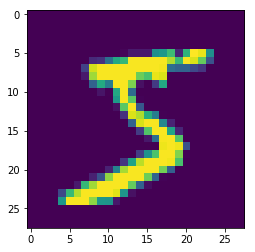

In [224]:
plt.imshow(x_train[0])
plt.show()

In [227]:
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

y_train[y_train == 5] = 0
y_train[y_train == 6] = 1
y_test[y_test == 5] = 0
y_test[y_test == 6] = 1

In [228]:
# Implementation of a simple MLP network with one hidden layer. Tested on the iris data set.
# Requires: numpy, sklearn>=0.18.1, tensorflow>=1.0

# NOTE: In order to make the code simple, we rewrite x * W_1 + b_1 = x' * W_1'
# where x' = [x | 1] and W_1' is the matrix W_1 appended with a new row with elements b_1's.
# Similarly, for h * W_2 + b_2

# author :vinhkhuc  Feb 26, 2017

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)


def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, w_2):
    """
    Forward-propagation.
    IMPORTANT: yhat is not softmax since TensorFlow's softmax_cross_entropy_with_logits() does that internally.
    """
    h    = tf.nn.sigmoid(tf.matmul(X, w_1))  # The \sigma function
    yhat = tf.matmul(h, w_2)  # The \varphi function
    return yhat

def get_data(data, target):
    """ Read the iris data set and split them into training and test sets """
    
    # Prepend the column of 1s for bias
    N, M = data.shape
    all_X = np.ones((N, M + 1))
    all_X[:, 1:] = data

    # Convert into one-hot vectors
    num_labels = len(np.unique(target)) # needs to be nine since the options are 3 and 8, not 0 and 1
    all_Y = np.eye(num_labels)[target]
    return all_X, all_Y

def main():
    train_X, train_y = get_data(x_train, y_train)
    test_X, test_y = get_data(x_test, y_test)

    # Layer's sizes
    x_size = train_X.shape[1]   # Number of input nodes: 4 features and 1 bias
    h_size = 256                # Number of hidden nodes
    y_size = train_y.shape[1]   # Number of outcomes (3 iris flowers)

    # Symbols
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])

    # Weight initializations
    w_1 = init_weights((x_size, h_size))
    w_2 = init_weights((h_size, y_size))

    # Forward propagation
    yhat    = forwardprop(X, w_1, w_2)
    predict = tf.argmax(yhat, axis=1)

    # Backward propagation
    cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

    # Run SGD
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(10):
        # Train with each example
        for i in range(len(train_X)):
            sess.run(updates, feed_dict={X: train_X[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_X, y: train_y}))
        test_accuracy  = np.mean(np.argmax(test_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: test_X, y: test_y}))

        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    sess.close()

if __name__ == '__main__':
    main()

Epoch = 1, train accuracy = 94.01%, test accuracy = 94.11%
Epoch = 2, train accuracy = 94.68%, test accuracy = 94.92%
Epoch = 3, train accuracy = 94.83%, test accuracy = 94.32%
Epoch = 4, train accuracy = 94.23%, test accuracy = 94.65%
Epoch = 5, train accuracy = 93.21%, test accuracy = 92.97%
Epoch = 6, train accuracy = 90.41%, test accuracy = 91.03%
Epoch = 7, train accuracy = 90.91%, test accuracy = 90.32%
Epoch = 8, train accuracy = 60.46%, test accuracy = 59.24%
Epoch = 9, train accuracy = 72.70%, test accuracy = 72.54%
Epoch = 10, train accuracy = 60.43%, test accuracy = 59.03%


In [230]:
# Implementation of a simple MLP network with one hidden layer. Tested on the iris data set.
# Requires: numpy, sklearn>=0.18.1, tensorflow>=1.0

# NOTE: In order to make the code simple, we rewrite x * W_1 + b_1 = x' * W_1'
# where x' = [x | 1] and W_1' is the matrix W_1 appended with a new row with elements b_1's.
# Similarly, for h * W_2 + b_2

# author :vinhkhuc  Feb 26, 2017

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)


def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, w_2):
    """
    Forward-propagation.
    IMPORTANT: yhat is not softmax since TensorFlow's softmax_cross_entropy_with_logits() does that internally.
    """
    h    = tf.nn.sigmoid(tf.matmul(X, w_1))  # The \sigma function
    yhat = tf.matmul(h, w_2)  # The \varphi function
    return yhat

def get_data(data, target):
    """ Read the iris data set and split them into training and test sets """
    
    # Prepend the column of 1s for bias
    N, M = data.shape
    all_X = np.ones((N, M + 1))
    all_X[:, 1:] = data

    # Convert into one-hot vectors
    num_labels = len(np.unique(target))
    all_Y = np.eye(num_labels)[target]
    return all_X, all_Y

def main():
    train_X, train_y = get_data(x_train, y_train)
    test_X, test_y = get_data(x_test, y_test)

    # Layer's sizes
    x_size = train_X.shape[1]   # Number of input nodes: 4 features and 1 bias
    h_size = 25                 # Number of hidden units
    y_size = train_y.shape[1]   # Number of outcomes (3 iris flowers)

    # Symbols
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])

    # Weight initializations
    w_1 = init_weights((x_size, h_size))
    w_2 = init_weights((h_size, y_size))

    # Forward propagation
    yhat    = forwardprop(X, w_1, w_2)
    predict = tf.argmax(yhat, axis=1)

    # Backward propagation
    cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

    # Run SGD
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(10):
        # Train with each example
        for i in range(len(train_X)):
            sess.run(updates, feed_dict={X: train_X[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_X, y: train_y}))
        test_accuracy  = np.mean(np.argmax(test_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: test_X, y: test_y}))

        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    sess.close()

if __name__ == '__main__':
    main()

Epoch = 1, train accuracy = 80.22%, test accuracy = 80.59%
Epoch = 2, train accuracy = 88.21%, test accuracy = 87.14%
Epoch = 3, train accuracy = 87.73%, test accuracy = 87.95%
Epoch = 4, train accuracy = 84.06%, test accuracy = 83.51%
Epoch = 5, train accuracy = 92.22%, test accuracy = 92.32%
Epoch = 6, train accuracy = 92.49%, test accuracy = 92.54%
Epoch = 7, train accuracy = 90.68%, test accuracy = 90.65%
Epoch = 8, train accuracy = 93.92%, test accuracy = 93.41%
Epoch = 9, train accuracy = 94.70%, test accuracy = 94.54%
Epoch = 10, train accuracy = 93.67%, test accuracy = 93.30%
